# Initial notebook to visualize SignalR resuls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Update path to your log file below:

In [12]:
path=r"c:\Results\10users150sec1800stt05.jtl"

useful_col_names=['timeStamp', 'label', 'elapsed', 'success']
col_names=['timeStamp','elapsed','label','responseCode','responseMessage','threadName','dataType','success','failureMessage','bytes','sentBytes','grpThreads','allThreads','URL','Latency','IdleTime','Connect']

In [15]:
df=pd.read_csv(path)
df=df[useful_col_names]

transaction_pattern=r'^\d{2,3}_.+'
tr_df=df[df.label.str.contains(transaction_pattern)]

print (tr_df.head(20))

        timeStamp                        label  elapsed  success
1   1561673112897                 00_Discovery      969     True
3   1561673116249                 01_Get_token      998     True
7   1561673122260  02_Configuration_and_alerts      403     True
9   1561673124265                  03_Identity      307     True
16  1561673127900                 00_Discovery      355     True
21  1561673130559                 01_Get_token     1053     True
30  1561673136216  02_Configuration_and_alerts      389     True
32  1561673138208                  03_Identity       84     True
47  1561673142881                 00_Discovery      297     True
54  1561673142083              04_Join_session     1335     True
56  1561673145481                 01_Get_token      785     True
59  1561673148233         05_Send_chat_message      155     True
63  1561673149190                  06_Projects      312     True
70  1561673150879  02_Configuration_and_alerts      371     True
73  1561673150315        

In [28]:
tr_df.set_index('timeStamp', inplace=True)
grouped=tr_df.groupby(["label", "success"])

for name,group in grouped:
    print(name)
    #print(group)
tr_df.head()

('00_Discovery', True)
('01_Get_token', True)
('02_Configuration_and_alerts', True)
('03_Identity', True)
('04_Join_session', True)
('05_Send_chat_message', True)
('06_Projects', True)
('07_Documents_calls', True)
('08_Add_markup', True)
('09_get_markups_from_other_users', True)


,label,elapsed,success
timeStamp,,,
1561673112897,00_Discovery,969,True
1561673116249,01_Get_token,998,True
1561673122260,02_Configuration_and_alerts,403,True
1561673124265,03_Identity,307,True
1561673127900,00_Discovery,355,True


In [17]:
gr_to_plot=[]
for name,group in grouped:
    print(name)
    gr_to_plot.append(group)

('00_Discovery', True)
('01_Get_token', True)
('02_Configuration_and_alerts', True)
('03_Identity', True)
('04_Join_session', True)
('05_Send_chat_message', True)
('06_Projects', True)
('07_Documents_calls', True)
('08_Add_markup', True)
('09_get_markups_from_other_users', True)


In [18]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

### Main statictics:

In [31]:
print (grouped.agg([np.size, np.mean, np.std, np.min, np.max, percentile(50), percentile(90), percentile(95), percentile(99)]))

                                        elapsed                           \
                                           size         mean         std   
label                           success                                    
00_Discovery                    True         10   369.000000  211.728862   
01_Get_token                    True         10   893.600000   85.585824   
02_Configuration_and_alerts     True        665   369.953383   26.261646   
03_Identity                     True        663    82.574661   25.123563   
04_Join_session                 True        659  1849.779970  922.200651   
05_Send_chat_message            True        659   292.748103  100.762655   
06_Projects                     True        659   152.704097  102.647472   
07_Documents_calls              True        658  1052.367781  766.570769   
08_Add_markup                   True       6570   302.276712  112.163370   
09_get_markups_from_other_users True        655     2.325191   22.403982   

           

### Plot Elapsed time

label                            success
00_Discovery                     True       AxesSubplot(0.125,0.125;0.775x0.755)
01_Get_token                     True       AxesSubplot(0.125,0.125;0.775x0.755)
02_Configuration_and_alerts      True       AxesSubplot(0.125,0.125;0.775x0.755)
03_Identity                      True       AxesSubplot(0.125,0.125;0.775x0.755)
04_Join_session                  True       AxesSubplot(0.125,0.125;0.775x0.755)
05_Send_chat_message             True       AxesSubplot(0.125,0.125;0.775x0.755)
06_Projects                      True       AxesSubplot(0.125,0.125;0.775x0.755)
07_Documents_calls               True       AxesSubplot(0.125,0.125;0.775x0.755)
08_Add_markup                    True       AxesSubplot(0.125,0.125;0.775x0.755)
09_get_markups_from_other_users  True       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

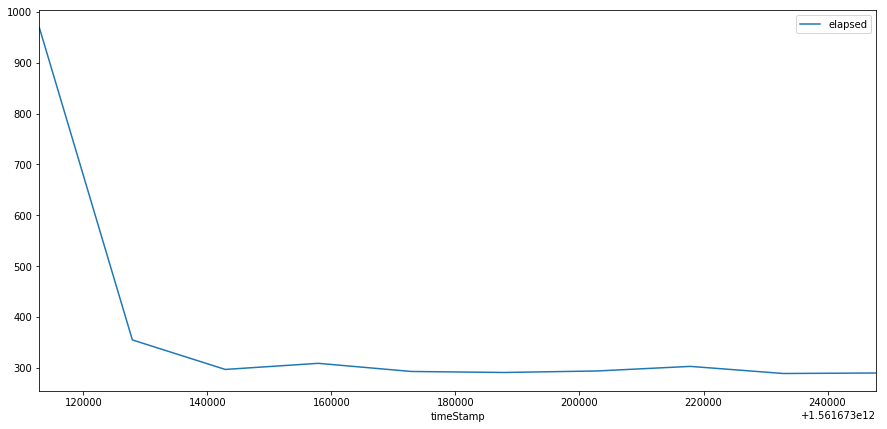

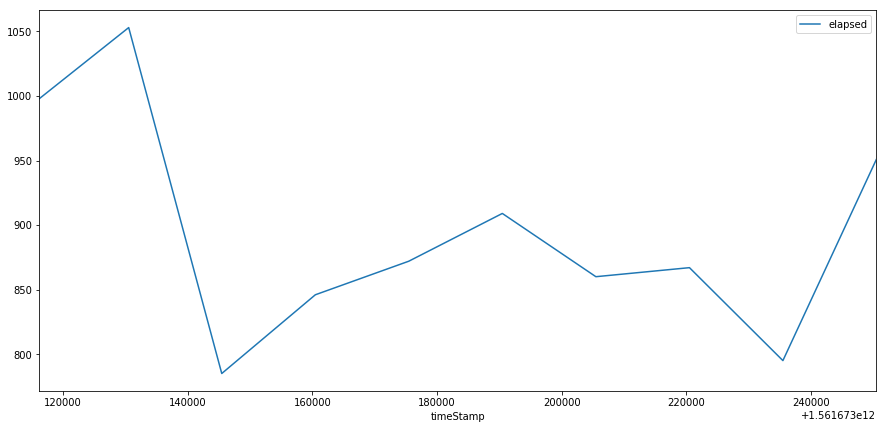

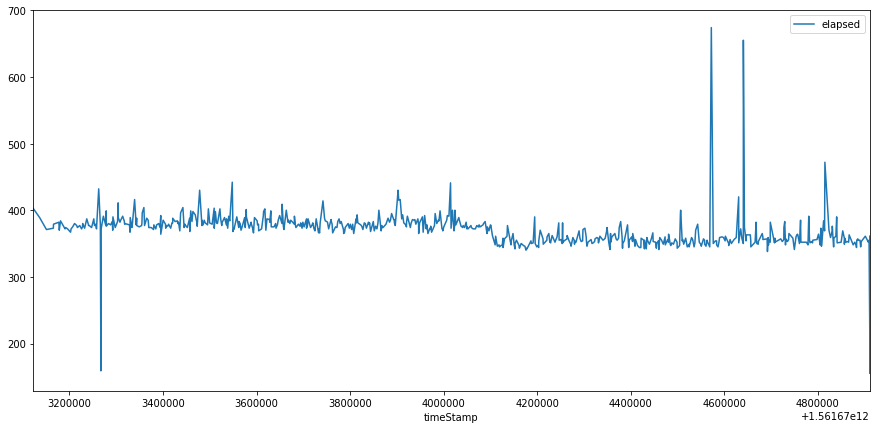

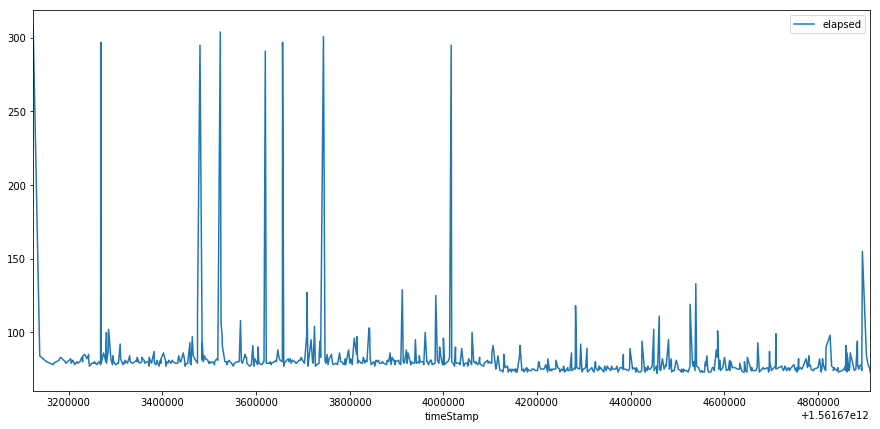

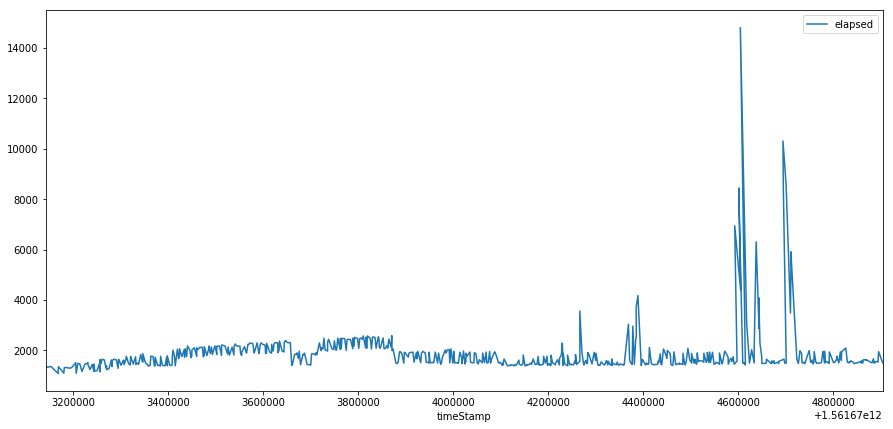

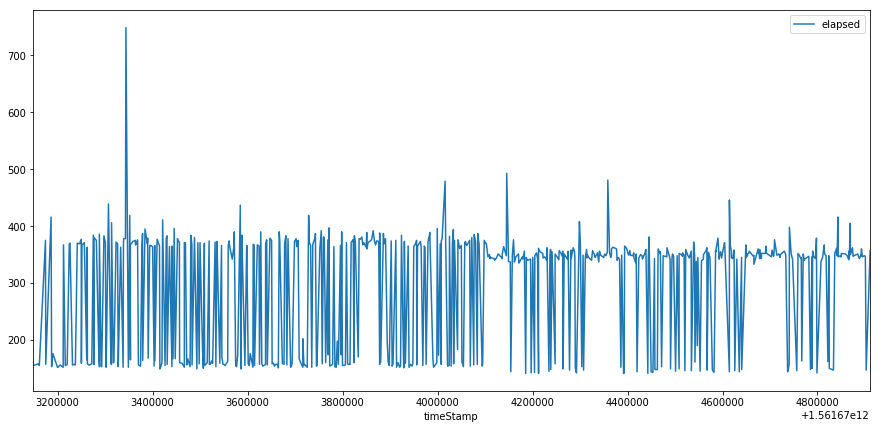

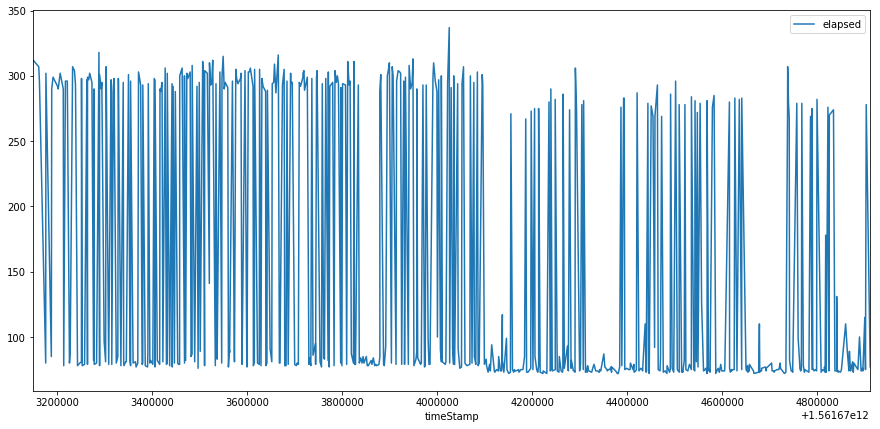

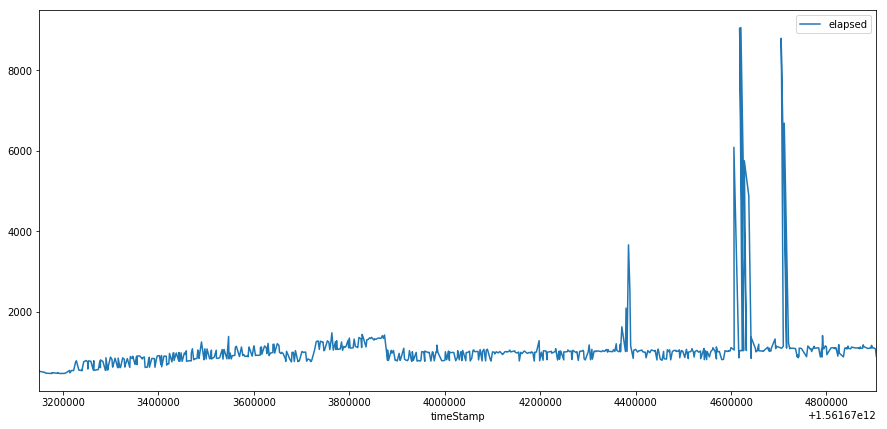

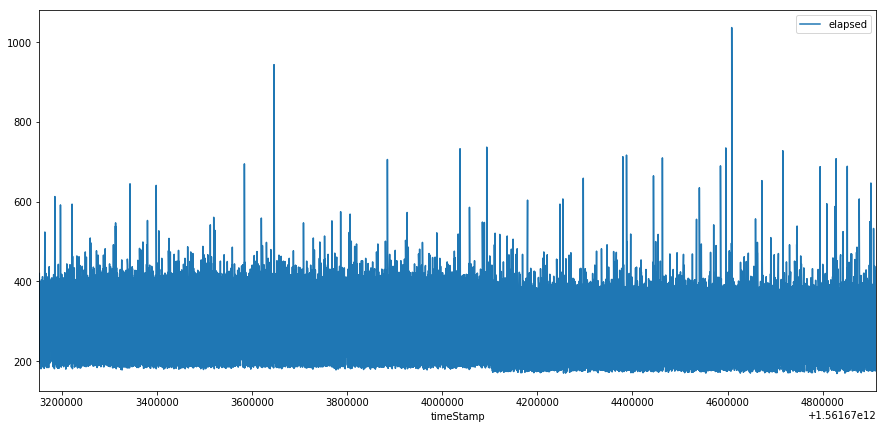

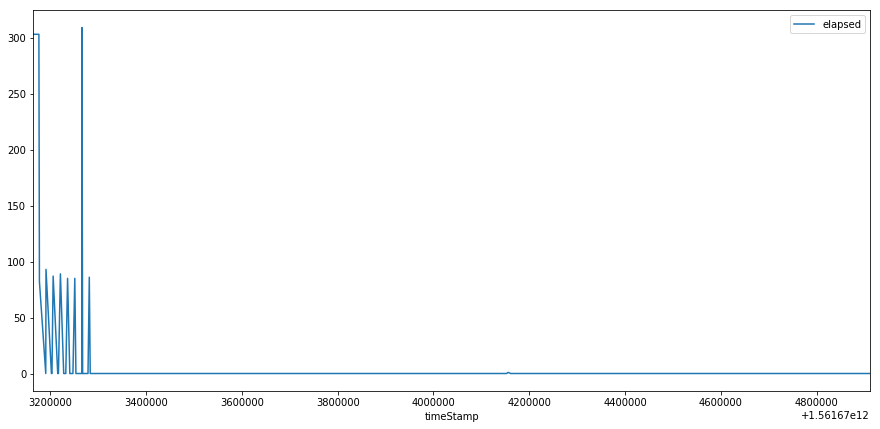

In [36]:
grouped.plot(figsize=(15,7))

Uncomment next code block to get bar chart (takes long time)

In [40]:
def plot_all_ar_one_graph(grouped, kind='line'):
    fig, ax = plt.subplots(figsize=(15,7))
    for label, df in grouped:
        df.elapsed.plot(kind=kind, ax=ax, label=label)
    plt.legend()

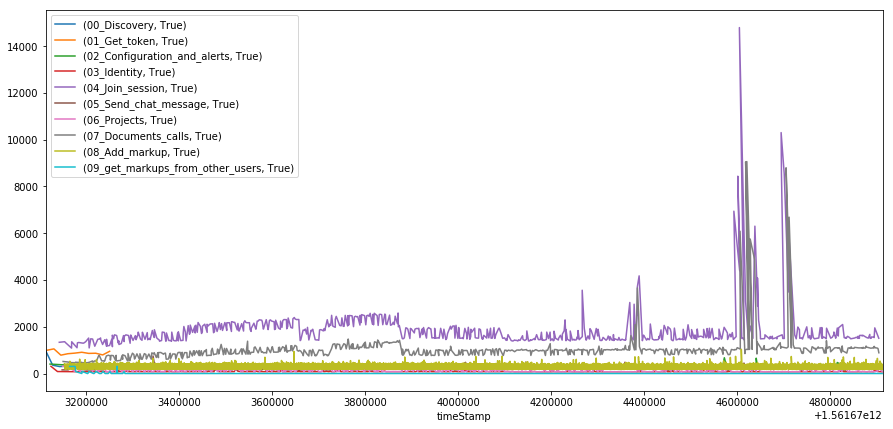

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
for label, df in grouped:
    df.elapsed.plot(ax=ax, label=label)
plt.legend()

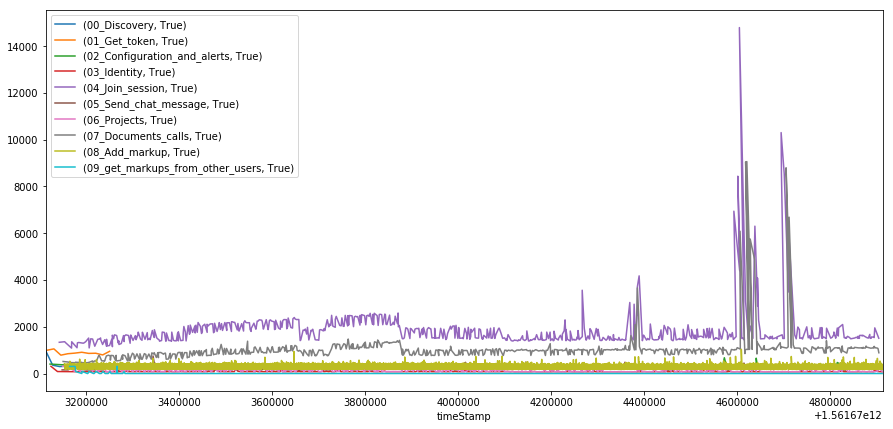

In [41]:
plot_all_ar_one_graph(grouped)

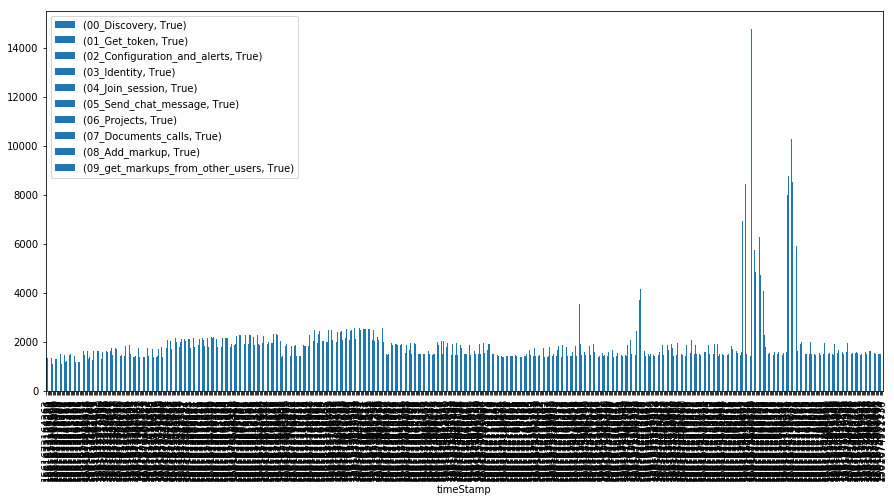

In [42]:
plot_all_ar_one_graph(grouped,kind='bar')

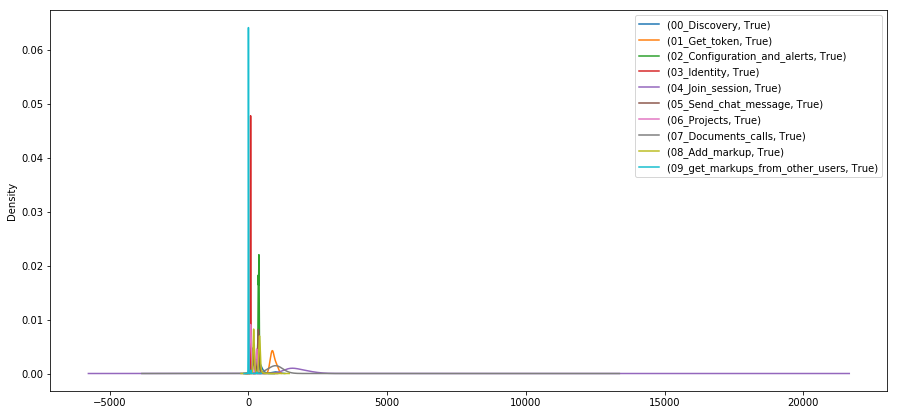

In [43]:
plot_all_ar_one_graph(grouped,kind='kde')

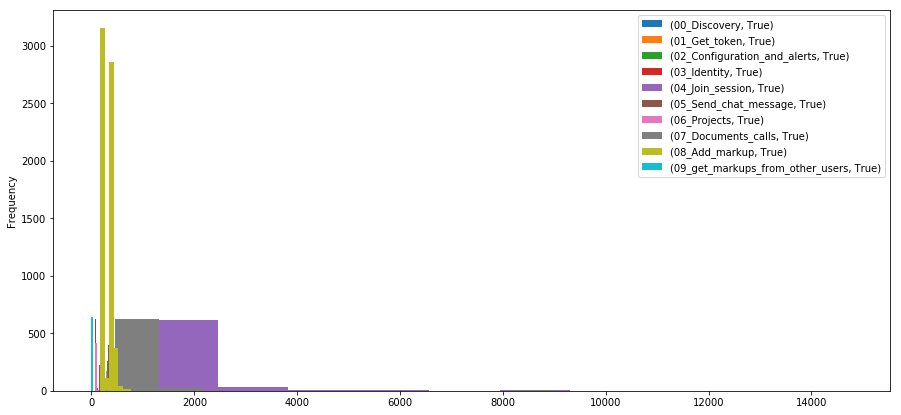

In [54]:
plot_all_ar_one_graph(grouped,kind='hist')

No handles with labels found to put in legend.


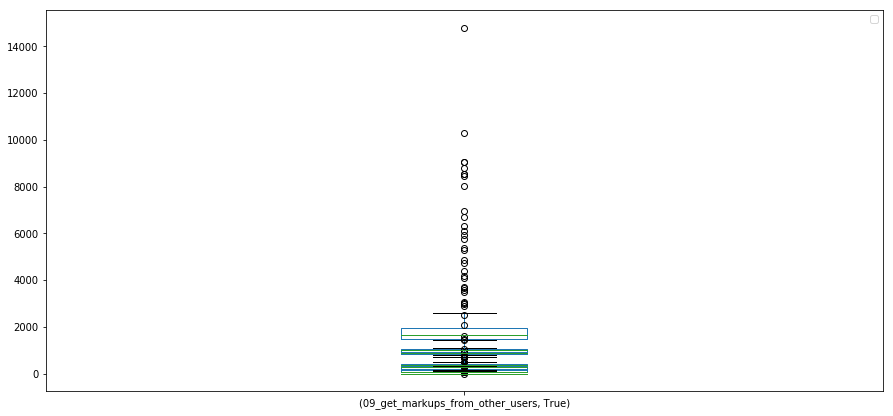

In [55]:
plot_all_ar_one_graph(grouped,kind='box')

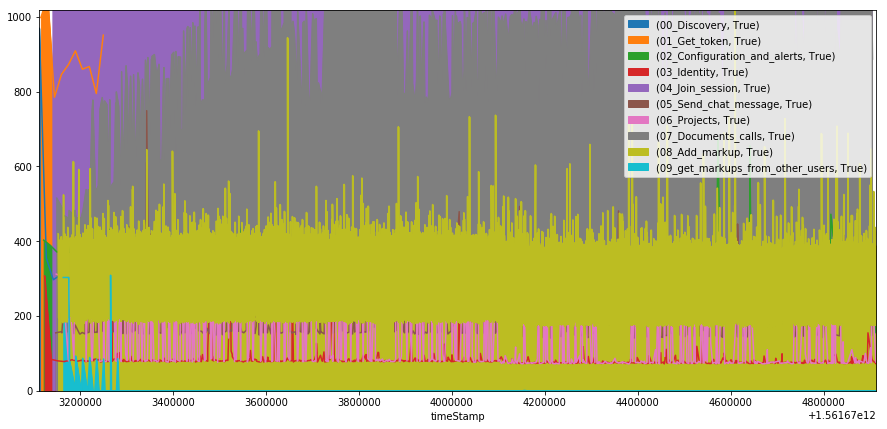

In [61]:
plot_all_ar_one_graph(grouped,kind='area')

In [62]:
plot_all_ar_one_graph(grouped,kind='pie')

ValueError: Image size of 514x158485 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x504 with 1 Axes>

ValueError: plot kind 'hexbin' can only be used for data frames

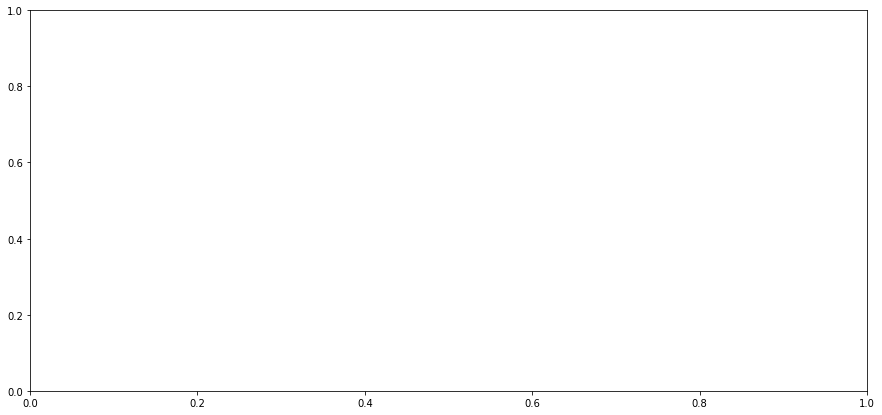

In [63]:
plot_all_ar_one_graph(grouped,kind='hexbin')

In [51]:
def hist_all_at_one_axis(grouped, bins=100):
    fig, ax = plt.subplots(figsize=(15,7))
    for label, df in grouped:
        df.elapsed.hist(bins=bins)
    plt.legend()

No handles with labels found to put in legend.


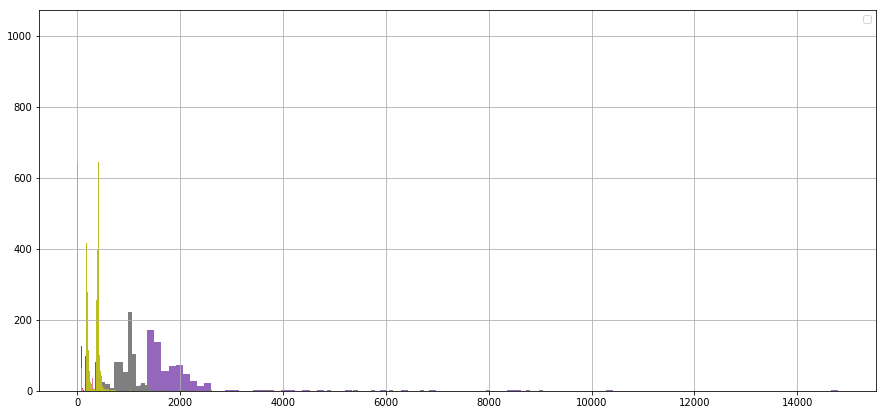

In [52]:
hist_all_at_one_axis(grouped)

In [20]:
import datetime as dt
df2=pd.read_csv(path,  header=None, names=col_names)
df2['Timestamp']=df2['Timestamp'].apply(lambda x: dt.datetime.strptime(x,'%H:%M:%S:%f'))
df2.shape
#df2.dtypes

(30096, 4)

#### You can filter results which used for visualization. 
Block below plots firts 20000 lines. You may change this value, or plot only last records (f.e. df2[:-2000]) or some part in the middle (f.e. df2[10000:20000]).

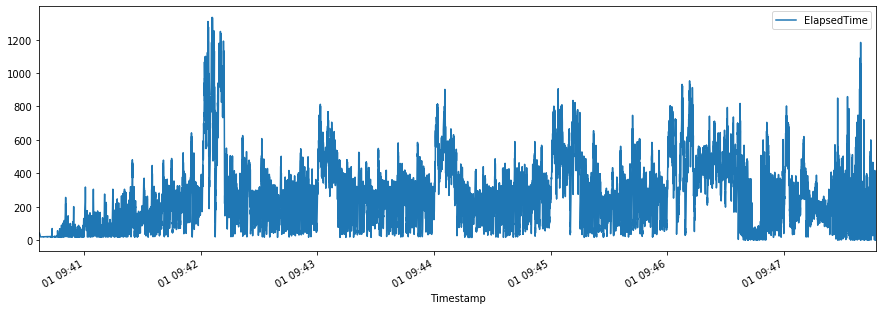

In [21]:
df2[:20000].plot(figsize=(15,7), x='Timestamp', y='ElapsedTime')

#### Plot with dots instead of lines.

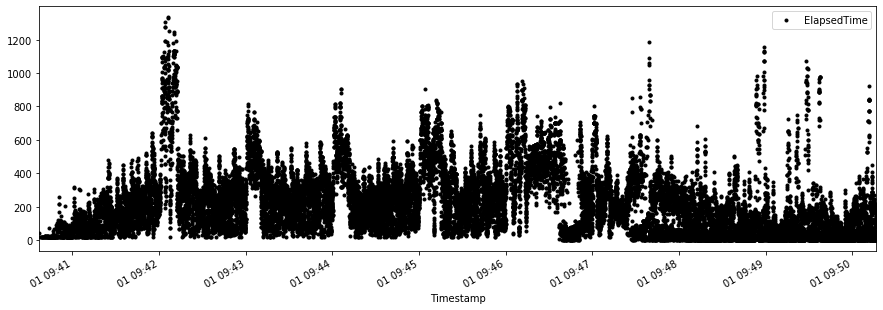

In [15]:
df2.plot(style='k.', figsize=(15,5), x='Timestamp', y='ElapsedTime')

#### Filter elapsed times less than 500ms and plot histogram. You can change number of bins (1 to 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a913518>]],
      dtype=object)

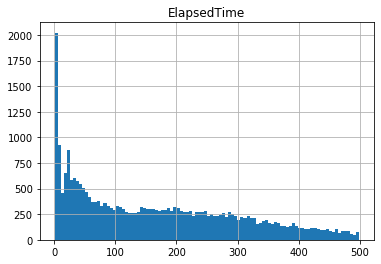

In [16]:
df2[df2.ElapsedTime<500].hist(column='ElapsedTime', bins=100)

#### Plot distribution of response times.

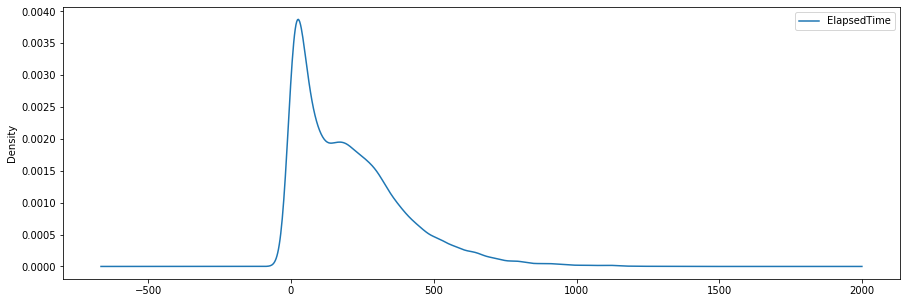

In [17]:
df2.plot(figsize=(15,5), kind='kde', x='Timestamp', y='ElapsedTime')

#### Filter transaction longer than 1 sec (1000ms) and plot it

In [30]:
df3=df2[df2.ElapsedTime>1000]
df3.describe()

,ElapsedTime
count,93.000000
mean,1099.946237
std,74.939014
min,1003.000000
25%,1034.000000
50%,1093.000000
75%,1129.000000
max,1333.000000


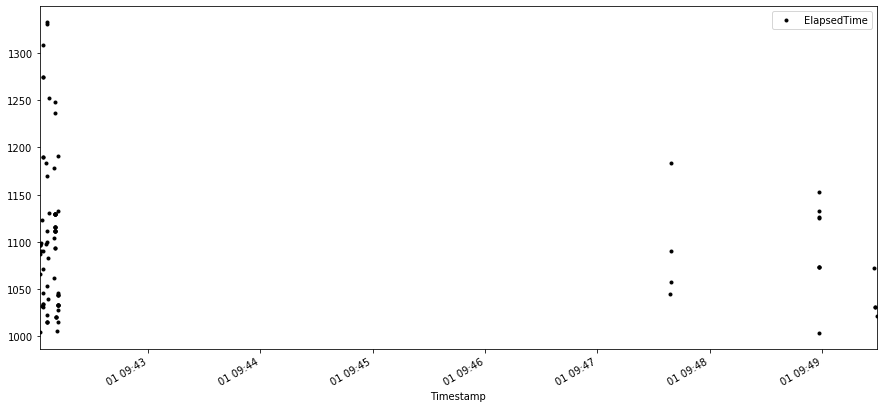

In [33]:
df3.plot(figsize=(15,7), style="k.", x='Timestamp', y='ElapsedTime')